In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

# Lab 2

## Part 1

In [79]:
# load the dataset
features, target = datasets.load_diabetes(as_frame=True, return_X_y=True)
df = features.copy()
df['target'] = target

### Frame the problem

The goal is to build a model that predicts diabetes progression one year after baseline, using medical features from the diabets dataset. We will explore different models and evaluate them using R-squared, MAE, and MAPE to find the best predictor.

### Exploratory Data Analysis (EDA)

The dataset contains 442 diabetes patients and 10 baseline variables, as well as the target variable, which is a quantitative measure of disease progression one year after baseline.

All features are numerical, and have been standardized and normalized, ranged between -1 and 1. The target variable is continuous and numeerical.

The 10 features are:

* **age**: age in years
* **sex**
* **bmi**: body mass index
* **bp**: average blood pressure
* **s1**: tc, total serum cholesterol
* **s2**: ldl, low-density lipoproteins
* **s3**: hdl, high-density lipoproteins
* **s4**: tch, total cholesterol / HDL
* **s5**: ltg, possibly log of serum triglycerides level
* **s6**: glu, blood sugar level

In [80]:
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [81]:
# dataset statistics
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


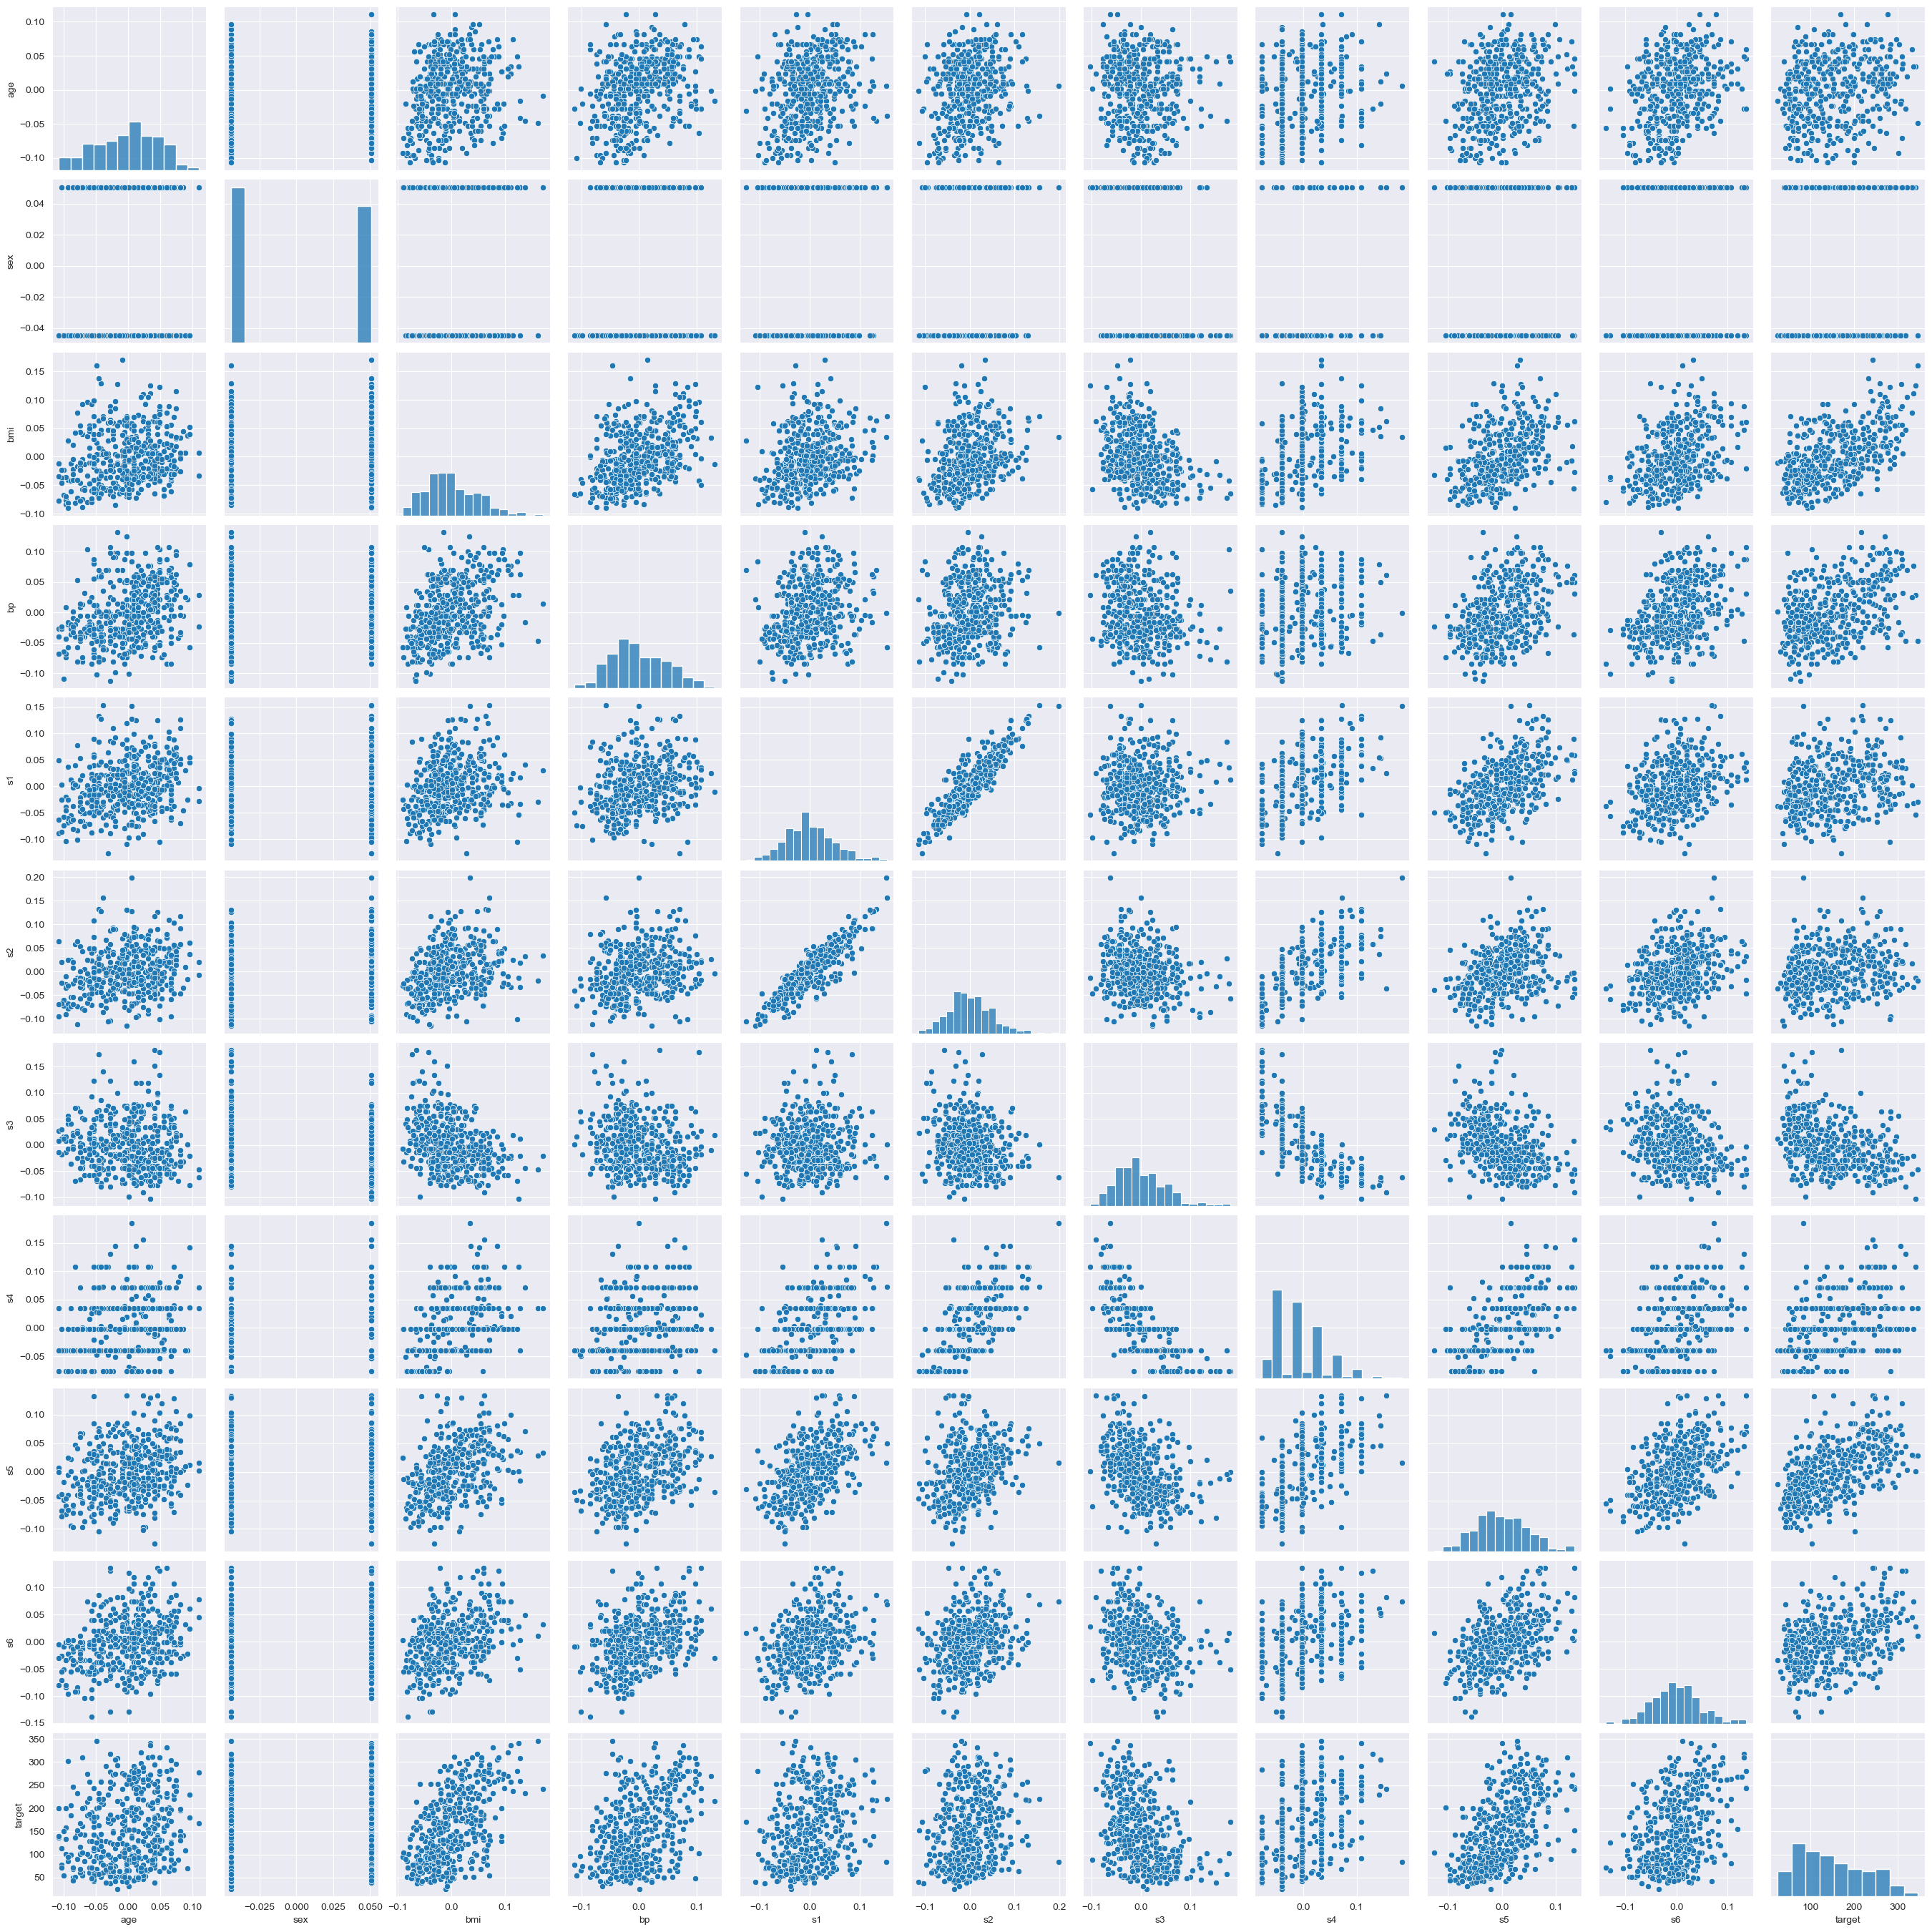

In [82]:
# scatter plots
sns.pairplot(df, diag_kind='hist')
plt.show()

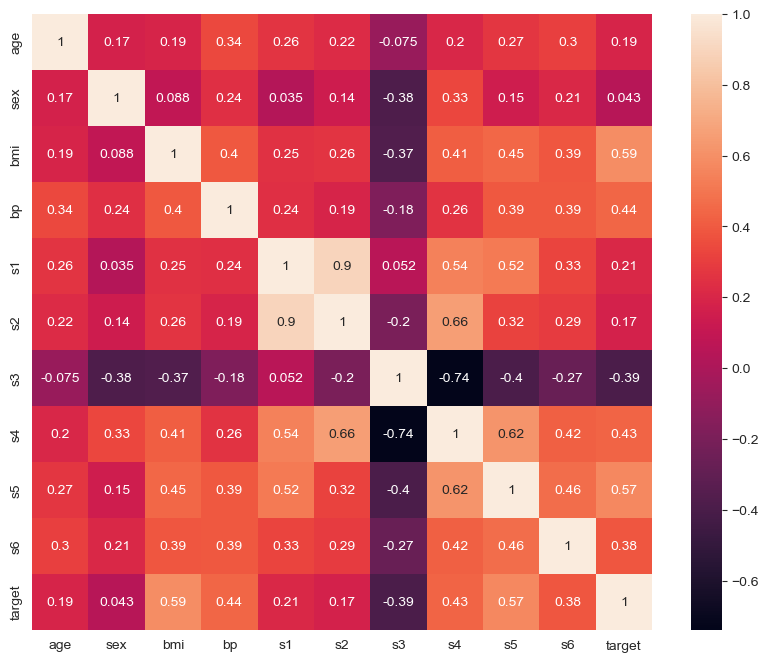

In [83]:
# correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#### Insights

Through the dataset statistics, we can know that the features are already standardized and normalized, since they all have a mean of almost 0 and a standard deviation of 4.761905e-02.

The pair plot shows that:
- There is no clear linear relationship between the features and the target variable.
- There are some features that have a clear linear relationship between them, such as s1 and s2, which indicates that these features may be highly correlated.
- In the histograms, most of the features have a distribution that approximates a normal distribution. However, some features have a distribution that is skewed to the right, such as bmi, s3 and s4.
- The distribution of sex is discrete, indicating that it is a categorical feature rather than a continuous feature.  

The correlation matrix shows that:
- BMI and s5 have the highest correlation with the target variable, with a correlation coefficient of 0.59 and 0.57, respectively. This indicates that these features may have a higher impact on progression of diabetes.
- S1 and S2 have a high correlation of 0.9, which indicates that they are highly correlated, and may present the same information.
- S3 and S4 have a high negative correlation of -0.74, which indicates that they are also highly correlated, but in the opposite direction.
- Sex has a very low correlation with the target variable, which indicates that the progression of diabetes may not be influenced by sex.

### Data Cleaning

#### Check for missing values

From the output below, we can see that there are no missing values in the dataset.

In [84]:
# check for missing values
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

#### Check for outliers

We can check for outliers by plotting box plots for each feature. The box plots below show that there are some outliers in the dataset. We will remove them using the IQR method.

The reason for using the IQR method is that the dataset is small, and not all features are normally distributed. The IQR method is more suitable for this case.


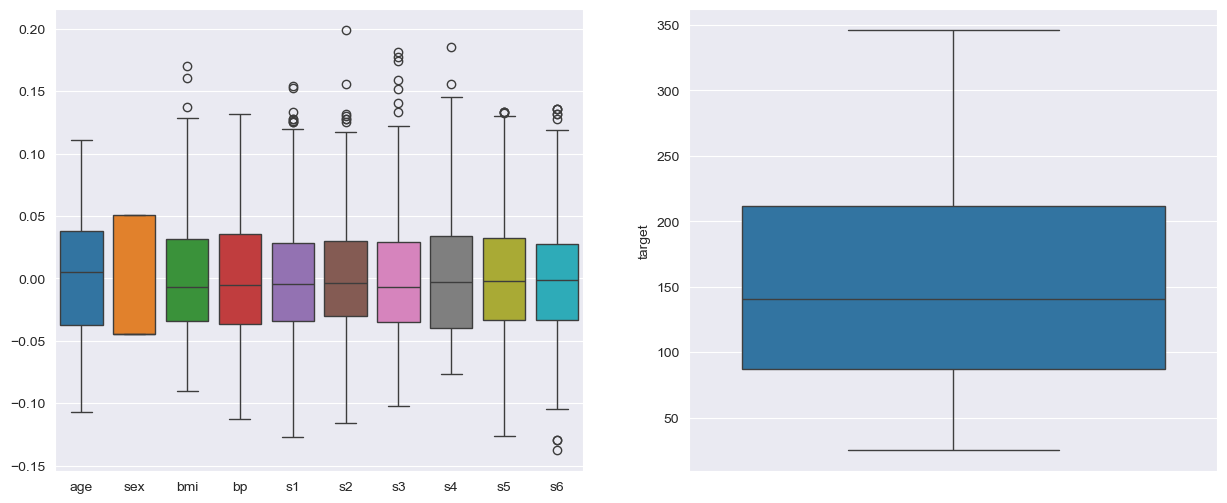

In [85]:
# box plots before removing outliers
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(data=df.drop(columns='target'), ax=ax[0])
sns.boxplot(data=df['target'], ax=ax[1])
plt.show()

#### Remove outliers

The box plots below show that the outliers have been removed from the dataset. The number of samples has decreased from 442 to 411 after removing the outliers.

In [86]:
# remove outliers based on IQR of given features
def remove_outliers_iqr(df, features):
  df_cleaned = df.copy()

  for feat in features:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each feature
    Q1 = df[feat].quantile(0.25)
    Q3 = df[feat].quantile(0.75)

    # Calculate the IQR for each feature
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for each feature
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers for each feature
    df_cleaned = df_cleaned[(df_cleaned[feat] >= lower_bound) & (df_cleaned[feat] <= upper_bound)]

  return df_cleaned


# remove outliers
features_to_clean = ['bmi', 's1', 's2', 's3', 's4', 's5', 's6']
df_cleaned = remove_outliers_iqr(df, features_to_clean)

print(f'Number of outliers removed: {df.shape[0] - df_cleaned.shape[0]}')
print(f'Samples before: {df.shape[0]}')
print(f'Samples after: {df_cleaned.shape[0]}')

df_cleaned.describe()

Number of outliers removed: 31
Samples before: 442
Samples after: 411


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,-0.000035,0.000352,-0.001478,-0.000254,-0.004133,-0.002347,-0.001573,-0.002205,-0.002924,-0.001823,149.970803
std,0.048200,0.047644,0.045594,0.046634,0.043897,0.044178,0.043387,0.044260,0.045482,0.044274,75.772954
min,-0.107226,-0.044642,-0.090275,-0.112399,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.104630,25.000000
25%,-0.034575,-0.044642,-0.034229,-0.033213,-0.035968,-0.030437,-0.032356,-0.039493,-0.034522,-0.034215,85.500000
50%,0.005383,-0.044642,-0.007284,-0.005670,-0.005697,-0.003819,-0.006584,-0.002592,-0.005142,-0.001078,139.000000
75%,0.038076,0.050680,0.028284,0.032769,0.023198,0.026087,0.026550,0.034309,0.028339,0.027917,202.000000
max,0.110727,0.050680,0.128521,0.132044,0.109883,0.117056,0.122273,0.145012,0.130079,0.119043,341.000000


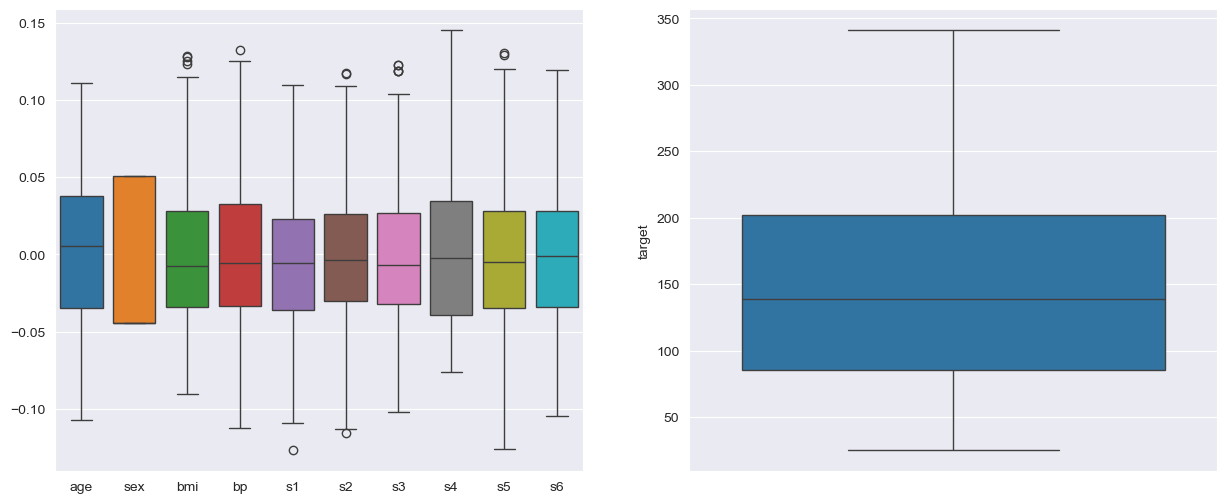

In [87]:
# box plots after removing outliers
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(data=df_cleaned.drop(columns='target'), ax=ax[0])
sns.boxplot(data=df_cleaned['target'], ax=ax[1])
plt.show()

### Split the dataset

In [88]:
X = df_cleaned.drop(columns='target')
y = df_cleaned['target']

# split the dataset into train, validation, and test sets
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.6, random_state=42)

print(f'Train set samples: {X_train.shape[0]}')
print(f'Validation set samples: {X_val.shape[0]}')
print(f'Test set samples: {X_test.shape[0]}')

Train set samples: 308
Validation set samples: 41
Test set samples: 62


## Part 2

### Univariate polynomial regression model

#### Train the models

In [89]:
# train a polynomial regression model of a given degree
def train_polynomial_regression_model(X, y, degree):
  # transform the features
  ploy_features = PolynomialFeatures(degree=degree)
  X_poly = ploy_features.fit_transform(X)

  # train the model
  model = LinearRegression()
  model.fit(X_poly, y)

  return model

In [90]:
# train 6 models with degrees from 0 to 5
models = []
for degree in range(6):
  model = train_polynomial_regression_model(X_train[['bmi']], y_train, degree)
  models.append(model)

In [91]:
def validate_poly_model(model, X, y, degree):
  # transform the features
  poly_features = PolynomialFeatures(degree=degree)
  X_poly = poly_features.fit_transform(X)

  # predict
  y_pred = model.predict(X_poly)

  # Calculate R-squared
  r_squared = r2_score(y, y_pred)

  # Calculate MAE
  mae = mean_absolute_error(y, y_pred)

  # Calculate MAPE
  mape = mean_absolute_percentage_error(y, y_pred)

  return r_squared, mae, mape

In [92]:
# validate the models
metrics = []
for degree in range(6):
  model = models[degree]
  metrics.append([degree,
                  *validate_poly_model(model, X_train[['bmi']], y_train, degree),
                  *validate_poly_model(model, X_val[['bmi']], y_val, degree)])

# convert results to df
columns = ['Degree', 'R-squared (train)', 'MAE (train)', 'MAPE (train)', 'R-squared (val)', 'MAE (val)', 'MAPE (val)']
metrics_df = pd.DataFrame(metrics, columns=columns)

metrics_df

,Degree,R-squared (train),MAE (train),MAPE (train),R-squared (val),MAE (val),MAPE (val)
0,0,0.000000,63.192486,0.595876,-0.004264,64.096690,0.581553
1,1,0.277040,52.560026,0.492025,0.352438,48.585299,0.371841
2,2,0.278661,52.353751,0.489135,0.337274,49.025941,0.383475
3,3,0.279193,52.243903,0.487429,0.330602,49.498275,0.389722
4,4,0.283782,52.091623,0.484516,0.337780,49.569627,0.394360
5,5,0.283830,52.090495,0.484409,0.336449,49.689268,0.395491


#### Compare the models

R-squared Analysis:
- Model 0 has the lowest R-squared value on both the training and validation sets. And on the validation set, it has a negative R-squared value, which indicates that it is even worse than an average model.
- Model 5 has the highest R-squared value on the training set, but it has the third lowest R-squared value on the validation set, which indicates that it is overfitting the training data.
- Model 1 has the highest R-squared value on the validation set.

MAE Analysis:
- Model 0 has the highest MAE value on both the training and validation sets.
- Model 5 has the lowest MAE value on the training set, but has the highest MAE on the validation set, which indicates that it is overfitting the training data.
- Model 1 has the lowest MAE value on the validation set.

MAPE Analysis:
- Model 0 has the highest MAPE value on both the training and validation sets.
- Model 5 has the lowest MAPE value on the training set, but has the highest MAPE on the validation set, which indicates that it is overfitting the training data.
- Model 1 has the lowest MAPE value on the validation set.

Based on the above analysis, all 6 models show similar results in all metrics, where the model with degree of 0 performs the worst on both the training and validation set, it is the worst model among all 6 models; the model with degree of 5 performs the best on the training set but the worst on the validation set, which indicates it is overfitting the training data. The best model is the model with degree 1, as it has the highest R-squared value, as well as the lowest MAE and MAPE values on the validation set.


#### Conclusion

The best model is the one with degree 1.

#### Test the best model

In [93]:
# test the best model
best_model = models[1]
best_metrics = validate_poly_model(best_model, X_test[['bmi']], y_test, 1)
pd.DataFrame([best_metrics], columns=['R-squared', 'MAE', 'MAPE'])

,R-squared,MAE,MAPE
0,0.478743,52.270757,0.520966


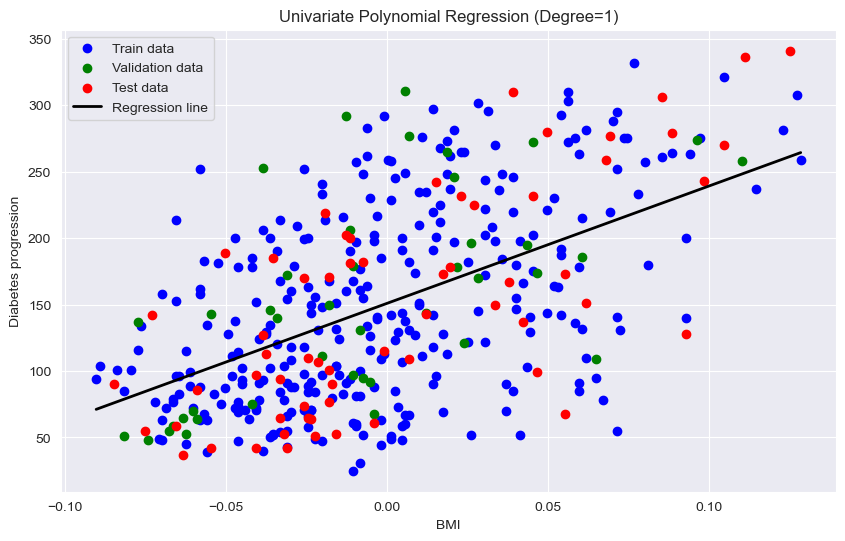

In [94]:
# plotting
def plot_polynomial_regression_model(model, X_train, y_train, X_val, y_val, X_test, y_test, degree):
  plt.figure(figsize=(10, 6))

  # plot all data points
  plt.scatter(X_train['bmi'], y_train, color='blue', label='Train data')
  plt.scatter(X_val['bmi'], y_val, color='green', label='Validation data')
  plt.scatter(X_test['bmi'], y_test, color='red', label='Test data')

  # find the min and max BMI across all sets
  min_bmi = min(X_train['bmi'].min(), X_val['bmi'].min(), X_test['bmi'].min())
  max_bmi = max(X_train['bmi'].max(), X_val['bmi'].max(), X_test['bmi'].max())

  # plot the regression line
  poly_features = PolynomialFeatures(degree=degree)
  X_new = np.linspace(min_bmi, max_bmi, 100).reshape(100, 1)
  X_new_poly = poly_features.fit_transform(X_new)
  y_new = model.predict(X_new_poly)

  plt.plot(X_new, y_new, linewidth=2, color='black', label='Regression line')

  plt.xlabel('BMI')
  plt.ylabel('Diabetes progression')
  plt.title(f'Univariate Polynomial Regression (Degree={degree})')
  plt.legend()
  plt.show()


plot_polynomial_regression_model(best_model, X_train, y_train, X_val, y_val, X_test, y_test, 1)

#### Equation

The equation of the best model is:
$$y = 882.95 \times bmi + 150.88$$


In [95]:
print(best_model.coef_)
print(best_model.intercept_)

[  0.         882.95354077]
150.88313305010533


#### Calculate for a specific BMI value

In [96]:
my_bmi = 0.03
poly_features = PolynomialFeatures(degree=1)
my_bmi_poly = poly_features.fit_transform([[my_bmi]])
y_pred = best_model.predict(my_bmi_poly)
print(f'Predicted diabetes progression for BMI {my_bmi} is {y_pred[0]}')

Predicted diabetes progression for BMI 0.03 is 177.37173927317363


#### Trainable parameters

For each model (with degree from 0 to 5), the number of trainable parameters is as follows:

- Degree 0: 1 parameter
  - 1 intercept
  - 0 coefficients  
- Degree 1: 2 parameters
  - 1 intercept
  - 1 coefficient (BMI) 
- Degree 2: 3 parameters
  - 1 intercept
  - 2 coefficients (BMI, BMI^2)
- Degree 3: 4 parameters
  - 1 intercept
  - 3 coefficients (BMI, BMI^2, BMI^3)
- Degree 4: 5 parameters
  - 1 intercept
  - 4 coefficients (BMI, BMI^2, BMI^3, BMI^4)
- Degree 5: 6 parameters
  - 1 intercept
  - 5 coefficients (BMI, BMI^2, BMI^3, BMI^4, BMI^5)

In [97]:
# number of trainable parameters
for degree in range(6):
  poly_features = PolynomialFeatures(degree=degree)
  poly_features.fit_transform(X_train[['bmi']])
  print(f'Degree {degree}: {poly_features.get_feature_names_out()}')

Degree 0: ['1']
Degree 1: ['1' 'bmi']
Degree 2: ['1' 'bmi' 'bmi^2']
Degree 3: ['1' 'bmi' 'bmi^2' 'bmi^3']
Degree 4: ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4']
Degree 5: ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']


#### Conclusion

The polynomial regression model using BMI with a degree of 1 is the best model among all 6 models. It has the highest R-squared value, as well as the lowest MAE and MAPE values on the validation set.

**Failures:**

- Higher degree models are overfitting the training data, as they perform well on the training set but poorly on the validation set.

**Limitations:**

- The model is univariate, it only considers the BMI feature. It may not capture the complex relationships between the target variable and other features.


## Part 3

### Multivariate polynomial regression model

#### Train the models

In [98]:
# train 2 models with degrees 1 and 5 using all features
degrees = [2, 5]
models = []
for degree in degrees:
  model = train_polynomial_regression_model(X_train, y_train, degree)
  models.append((degree, model))

In [99]:
# validate the models
metrics = []
for (degree, model) in models:
  metrics.append([degree,
                  *validate_poly_model(model, X_train, y_train, degree),
                  *validate_poly_model(model, X_val, y_val, degree)])

# convert results to df
columns = ['Degree', 'R-squared (train)', 'MAE (train)', 'MAPE (train)', 'R-squared (val)', 'MAE (val)', 'MAPE (val)']
metrics_df = pd.DataFrame(metrics, columns=columns)

metrics_df

,Degree,R-squared (train),MAE (train),MAPE (train),R-squared (val),MAE (val),MAPE (val)
0,2,0.587445,3.783943e+01,3.463513e-01,0.369411,48.590844,0.410042
1,5,1.000000,5.259714e-11,4.615134e-13,-19.196791,232.937161,1.861818


#### Compare the models

The model with degree 5 has the highest R-squared value and the lowest MAE and MAPE values on the training set. However, it has the lowest R-squared value (even negative) and the highest MAE and MAPE values on the validation set, which indicates that it is overfitting the training data.

The model with degree 2 has the highest R-squared value and the lowest MAE and MAPE values on the validation set. It is the best model among the two models.

In [100]:
# test the best model
best_degree, best_model = models[0]
best_metrics = validate_poly_model(best_model, X_test, y_test, best_degree)
pd.DataFrame([best_metrics], columns=['R-squared', 'MAE', 'MAPE'])

,R-squared,MAE,MAPE
0,0.515828,49.567554,0.481548


#### Equation

In [101]:
with np.printoptions(suppress=True, precision=2):
  print(f'coefficients: {best_model.coef_}\n')
  print(f'interecpt: {round(best_model.intercept_, 2)}')

coefficients: [     -0.       -32.51    -293.86     470.51     242.32  -38865.4
   34103.82   14283.67      -8.38   13484.28      83.84     772.39
    3744.1      283.86    -724.86  -28170.7    24075.07   10744.33
   -2818.17   12842.1     1643.9       -1.77     942.91    1226.73
   11497.77   -8001.62   -4143.67   -5439.04   -2403.47     835.33
   -1808.56    7745.79  -13899.29   16398.42    3828.64   -4638.29
    5374.08    1296.43   -1006.99   -1873.74    5431.96   -4169.41
   -5841.28    3102.04   -4773.43  149094.87 -211013.22 -135673.82
  -37947.82   10097.85    4939.79   70501.87   97164.08   25678.88
  -25593.01   -5130.16   31018.51   22082.04     301.19    4844.98
   11583.63    3427.42    8149.55   47610.74    -986.28    1336.31]

interecpt: -19.58


#### Trainable parameters

In [102]:
for (degree, _) in models:
  poly_features = PolynomialFeatures(degree=degree)
  poly_features.fit_transform(X_train)

  print(f'Degree {degree}:\n\tlen: {len(poly_features.get_feature_names_out())}')
  print(f'\t{poly_features.get_feature_names_out()}\n')

Degree 2:
	len: 66
	['1' 'age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'age^2'
 'age sex' 'age bmi' 'age bp' 'age s1' 'age s2' 'age s3' 'age s4' 'age s5'
 'age s6' 'sex^2' 'sex bmi' 'sex bp' 'sex s1' 'sex s2' 'sex s3' 'sex s4'
 'sex s5' 'sex s6' 'bmi^2' 'bmi bp' 'bmi s1' 'bmi s2' 'bmi s3' 'bmi s4'
 'bmi s5' 'bmi s6' 'bp^2' 'bp s1' 'bp s2' 'bp s3' 'bp s4' 'bp s5' 'bp s6'
 's1^2' 's1 s2' 's1 s3' 's1 s4' 's1 s5' 's1 s6' 's2^2' 's2 s3' 's2 s4'
 's2 s5' 's2 s6' 's3^2' 's3 s4' 's3 s5' 's3 s6' 's4^2' 's4 s5' 's4 s6'
 's5^2' 's5 s6' 's6^2']

Degree 5:
	len: 3003
	['1' 'age' 'sex' ... 's5^2 s6^3' 's5 s6^4' 's6^5']



#### Conclusion

The model with degree 2 performs the best, while the model with degree 5 is overfitting.

For the model with degree 5, the R-squared value is 1, and both MAE and MSE are extremely low, almost approaching 0 on the training set. However,the performance on the validation set is very poor, with a negative R-squared value, and very high MAE and MSE values, indicating that it overfits the training data.

Compared to the best univariate polynomial regression model (degree = 1), the multivariate polynomial regression model performs better on the test set with R-squared improved from 0.48 to 0.52, MAE decreased from 52.27 to 49.57, and MAPE decreased from 0.52 to 0.48. This is because it considers all the features, not just the BMI feature.

**Failures and limitations:**
- Although the model with degree 2 performs better than the best univariate polynomial regression model, the improvement is not significant.
- In multivariate polynomial regression models, the overfitting situation is more serious than in univariate polynomial regression models.

### Decision tree model

#### Train the models

In [103]:
# train decision tree models with depths of 5 and 10
models = []
depths = [3, 10]

for depth in depths:
  model = DecisionTreeRegressor(max_depth=depth, random_state=42)
  model.fit(X_train, y_train)
  models.append((depth, model))

In [104]:
def validate_model(model, X, y):
  # predict
  y_pred = model.predict(X)

  # Calculate R-squared
  r_squared = r2_score(y, y_pred)

  # Calculate MAE
  mae = mean_absolute_error(y, y_pred)

  # Calculate MAPE
  mape = mean_absolute_percentage_error(y, y_pred)

  return r_squared, mae, mape

In [105]:
# validate the models
metrics = []

for (depth, model) in models:
  metrics.append([depth,
                  *validate_model(model, X_train, y_train),
                  *validate_model(model, X_val, y_val)])

# convert results to df
columns = ['Depth', 'R-squared (train)', 'MAE (train)', 'MAPE (train)', 'R-squared (val)', 'MAE (val)', 'MAPE (val)']
metrics_df = pd.DataFrame(metrics, columns=columns)

metrics_df

,Depth,R-squared (train),MAE (train),MAPE (train),R-squared (val),MAE (val),MAPE (val)
0,3,0.507711,41.744989,0.381302,0.355773,47.313031,0.369494
1,10,0.953305,8.024246,0.071248,-0.232538,65.139061,0.468686


#### Compare the models

The model with depth 3 has the highest R-squared value and the lowest MAE and MAPE values on the validation sets. It is the best model among the two models.

The model with depth 10 has the highest R-squared value and the lowest MAE and MAPE values on the training set. However, it has the lowest R-squared value and the highest MAE and MAPE values on the validation set, which indicates that it is overfitting the training data.

In [106]:
# test the best model
best_depth, best_model = models[0]
best_metrics = validate_model(best_model, X_test, y_test)
pd.DataFrame([best_metrics], columns=['R-squared', 'MAE', 'MAPE'])

,R-squared,MAE,MAPE
0,0.419848,51.328818,0.482788


#### Conclusion

The decision tree model with depth 3 performs the best, while the model with depth 10 is overfitting.

Decision tree models are prone to overfitting, especially when the depth is too large. The model with depth 10 has a high R-squared value and low MAE and MAPE values on the training set, but it performs poorly on the validation set, which indicates that it is overfitting the training data.

Compared to the best multi-variate polynomial regression model (degree = 2), the decision tree model performs slightly worse on the test set, with R-squared decreased from 0.52 to 0.42, MAE increased from 49.57 to 51.33, and MAPE increased from 0.482 to 0.483.



### kNN model

#### Train the models

In [107]:
# train kNN models with 3 and 5 neighbors
models = []
n_neighbors = [3, 7]

for n in n_neighbors:
  model = KNeighborsRegressor(n_neighbors=n)
  model.fit(X_train, y_train)
  models.append((n, model))

In [108]:
# validate the models
metrics = []

for (n, model) in models:
  metrics.append([n,
                  *validate_model(model, X_train, y_train),
                  *validate_model(model, X_val, y_val)])

# convert results to df
columns = ['Neighbors', 'R-squared (train)', 'MAE (train)', 'MAPE (train)', 'R-squared (val)', 'MAE (val)',
           'MAPE (val)']
metrics_df = pd.DataFrame(metrics, columns=columns)

metrics_df

,Neighbors,R-squared (train),MAE (train),MAPE (train),R-squared (val),MAE (val),MAPE (val)
0,3,0.620654,34.972944,0.308815,0.132076,55.707317,0.455784
1,7,0.512486,41.646568,0.369056,0.475851,43.585366,0.361173


#### Compare the models

The model with 3 neighbors has the highest R-squared value and the lowest MAE and MAPE values on the train set, but it has the lowest R-squared value and the highest MAE and MAPE values on the validation set, which indicates it overfits the training data.

The model with 7 neighbors has the highest R-squared value and the lowest MAE and MAPE values on the validation set. It is the best model among the two models.

In [109]:
# test the best model
best_neighbors, best_model = models[1]
best_metrics = validate_model(best_model, X_test, y_test)
pd.DataFrame([best_metrics], columns=['R-squared', 'MAE', 'MAPE'])

,R-squared,MAE,MAPE
0,0.570933,44.995392,0.448879


#### Conclusion

The kNN model with 7 neighbors performs the best, while the model with 3 neighbors is overfitting.

The lower the number of neighbors, the more likely it is to overfit the training data.

Compare to the decision tree and polynomial models, the kNN model performs the best on the test set, with the highest R-squared value of 0.57, and the lowest MAE and MAPE values of 45 and 0.45, respectively. The kNN model is the most suitable model for this case.